# Unsupervised Learning practice - Dimension Reduction

Dimension Reduction is one of the algorithms in Unsupervised Learning(UL). It allows the important features of dataset $\mathbb{D}$ to be kept in lower dimension.

# Principal component analysis(PCA) to Ising and Ising gauge model
L. Wang, Phys. Rev. B 94, 195105 (2016)

Principal component analysis(PCA) reduces the dimension of dataset by linear transformation P on dataset X. By doing this, we generate a lower dimensional representation of the dataset X.

For the case of spin lattice, the spin configurations are stored in an M $\times$ N matrix $X$. M is number of configurations and N is number of spins in each configuration.

For Ising spin lattice $N=L^{2}$, and for Ising gauge lattice $N=2L^{2}$

PCA operation is to be performed on a "shifted" $X$ called $X^{c}$ obtained by

$X^{c}_{ij}=X_{ij}-\frac{1}{M}\sum_{k=1}^{M}X_{kj}$

This just shifts the data $X$ to $X^{c}$ whose mean value of each spin component of configuration is zero. 

Then apply PCA operation matrix $P$ to $X^{c}$ to obtain principal component $X'$ 

$X'=X^{c}P$

where $P$ is determined by the equation

$\frac{1}{M-1}X^{cT}X^{c}=P^{T}DP$

Notice that the N x N matrix $V = \frac{1}{M-1}X^{cT}X^{c}$, called covariance matrix, stores the important statitistics information of data $X^{c}$. For example, its diagonal elements $V_{ii}$ refer to variance of i-th component in data and off-diagonal elements $V_{ij}$ refer to covariance of pair of component i and j in data. 

The essence of PCA is find the matrix P such that $X'=X^{c}P$  with $V'=\frac{1}{M-1}X'^{T}X'$ is diagonal, that is the covariance of X' of any component pair is zero, thus all components of $X'$ are uncorrelated so the name principal components.

To make $V=\frac{1}{M-1}X^{cT}X^{c}$ diagonal, it suffices to find the eigenvectors of V so we can use it to diagonalize $V$. So $P$ is composed of eigenvectors of V and $P^{-1}=P^{T}$ and $V = PDP^{-1}$

The eigenvalues $\lambda_{1}>\lambda_{2}>\lambda_{3}...>\lambda_{N'}$ are positive and the largest one $\lambda_{1}$ refers to signal component of the data while smallest one $\lambda_{N'}$ refers to noise component of the data.

A quantity explained variance ratio is defined by

$r_{\ell}=\frac{\lambda_{\ell}}{\sum_{\ell}\lambda_{\ell}}$

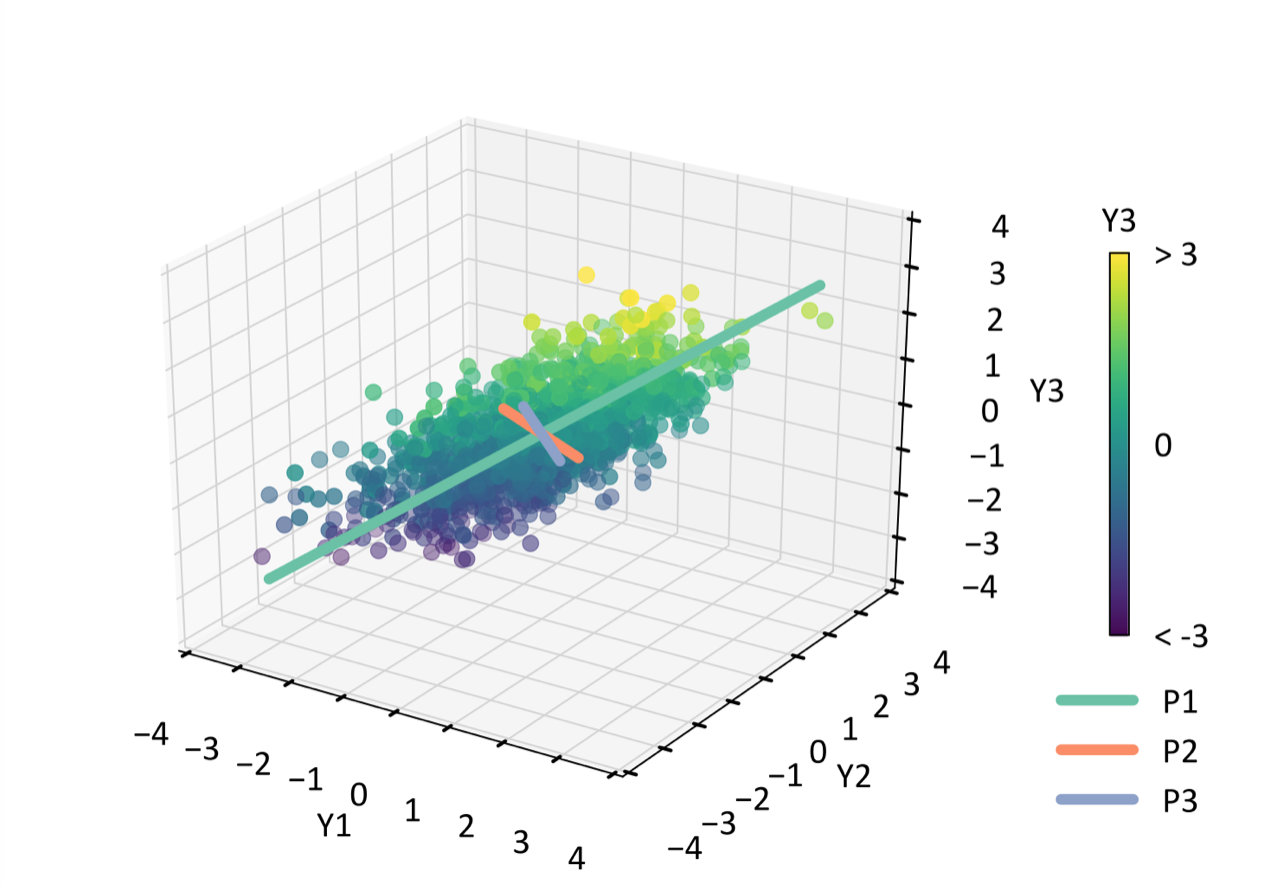

In [42]:
from IPython.display import Image
Image(filename="PCA.png",width=500,height=300)

# Read in data

In [1]:
import numpy as np

For the Ising model, you have been given data for L = 20, 40 and 80. Each spin configuration file contains 100 spin configurations at each of the 20 temperatures. 

For the Ising gauge theory, you have again been given data for L = 20, 40 and 80. Each spin configuration file contains 500 spin configurations corresponding to T = 0 (where the system becomes topologically ordered) and 500 spin configurations corresponding to T = âˆž.

In [2]:
x_ising_20 = np.loadtxt( 'spinConfigs_Ising_L20 copy.txt' , dtype='int8' )
t_ising_20 = np.loadtxt( 'temperatures_Ising_L20 copy.txt' , dtype='int8' )
x_ising_40 = np.loadtxt( 'spinConfigs_Ising_L40 copy.txt' , dtype='int8' )
t_ising_40 = np.loadtxt( 'temperatures_Ising_L40 copy.txt' , dtype='int8' )
x_ising_80 = np.loadtxt( 'spinConfigs_Ising_L80 copy.txt' , dtype='int8' )
t_ising_80 = np.loadtxt( 'temperatures_Ising_L80 copy.txt' , dtype='int8' )
x_gauge_20 = np.loadtxt( 'spinConfigs_gaugeTheory_L20 copy.txt' , dtype='int8' )
t_gauge_20 = np.loadtxt( 'labels_gaugeTheory_L20 copy.txt' , dtype='int8' )
x_gauge_40 = np.loadtxt( 'spinConfigs_gaugeTheory_L40 copy.txt' , dtype='int8' )
t_gauge_40 = np.loadtxt( 'labels_gaugeTheory_L40 copy.txt' , dtype='int8' )
x_gauge_80 = np.loadtxt( 'spinConfigs_gaugeTheory_L80 copy.txt' , dtype='int8' )
t_gauge_80 = np.loadtxt( 'labels_gaugeTheory_L80 copy.txt' , dtype='int8' )

Shift the data to mean=0 for each component

In [4]:
xc_ising_20 = x_ising_20 - np.sum(x_ising_20, axis = 0)/x_ising_20.shape[0]
xc_ising_40 = x_ising_40 - np.sum(x_ising_40, axis = 0)/x_ising_40.shape[0]
xc_ising_80 = x_ising_80 - np.sum(x_ising_80, axis = 0)/x_ising_80.shape[0]
xc_gauge_20 = x_gauge_20 - np.sum(x_gauge_20, axis = 0)/x_gauge_20.shape[0]
xc_gauge_40 = x_gauge_40 - np.sum(x_gauge_40, axis = 0)/x_gauge_40.shape[0]
xc_gauge_80 = x_gauge_80 - np.sum(x_gauge_80, axis = 0)/x_gauge_80.shape[0]

In [8]:
xc_gauge_80.shape, xc_ising_80.shape

((1000, 12800), (2000, 6400))

Construct PCA matrix $P$ by solving the eigenvalue problem

In [9]:
(lamb_ising_20, P_ising_20)= np.linalg.eig(np.dot(xc_ising_20.T,xc_ising_20))
(lamb_ising_40, P_ising_40)= np.linalg.eig(np.dot(xc_ising_40.T,xc_ising_40))
(lamb_ising_80, P_ising_80)= np.linalg.eig(np.dot(xc_ising_80.T,xc_ising_80))

In [10]:
(lamb_gauge_20, P_gauge_20)= np.linalg.eig(np.dot(xc_gauge_20.T,xc_gauge_20))
(lamb_gauge_40, P_gauge_40)= np.linalg.eig(np.dot(xc_gauge_40.T,xc_gauge_40))
(lamb_gauge_80, P_gauge_80)= np.linalg.eig(np.dot(xc_gauge_80.T,xc_gauge_80))

In [39]:
lamb_ising_80[0:10]

array([7717091.49886654+0.j,   47884.24538227+0.j,   45068.8158508 +0.j,
         43076.28598033+0.j,   39336.8900812 +0.j,   36498.9506363 +0.j,
         34014.64465585+0.j,   33644.22112331+0.j,   33044.90717293+0.j,
         29143.22758882+0.j])

In [40]:
lamb_gauge_80[0:10]

array([20817.32575521+0.j, 20728.22617199+0.j, 20668.1547347 +0.j,
       20596.50537233+0.j, 20564.65943413+0.j, 20498.64971528+0.j,
       20493.23888172+0.j, 20413.13588029+0.j, 20384.78520933+0.j,
       20317.06199037+0.j])

In [11]:
x_ising_prime_20 = np.dot(xc_ising_20, P_ising_20)
x_ising_prime_40 = np.dot(xc_ising_40, P_ising_40)
x_ising_prime_80 = np.dot(xc_ising_80, P_ising_80)
x_gauge_prime_20 = np.dot(xc_gauge_20, P_gauge_20)
x_gauge_prime_40 = np.dot(xc_gauge_40, P_gauge_40)
x_gauge_prime_80 = np.dot(xc_gauge_80, P_gauge_80)

In [12]:
x1_ising_prime_20 = x_ising_prime_20[:, 0]
x2_ising_prime_20 = x_ising_prime_20[:, 1]
x1_ising_prime_40 = x_ising_prime_40[:, 0]
x2_ising_prime_40 = x_ising_prime_40[:, 1]
x1_ising_prime_80 = x_ising_prime_80[:, 0]
x2_ising_prime_80 = x_ising_prime_80[:, 1]

In [13]:
x1_gauge_prime_20 = x_gauge_prime_20[:, 0]
x2_gauge_prime_20 = x_gauge_prime_20[:, 1]
x1_gauge_prime_40 = x_gauge_prime_40[:, 0]
x2_gauge_prime_40 = x_gauge_prime_40[:, 1]
x1_gauge_prime_80 = x_gauge_prime_80[:, 0]
x2_gauge_prime_80 = x_gauge_prime_80[:, 1]

# Draw scatter plot for x1, x2

In [14]:
import matplotlib.pyplot as plt

Plot the Ising case

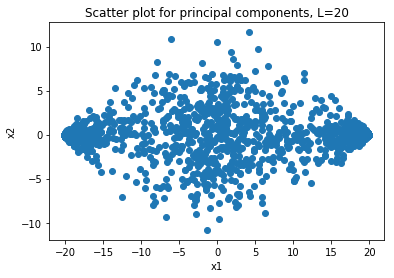

In [15]:
plt.scatter(x1_ising_prime_20, x2_ising_prime_20)
plt.title('Scatter plot for principal components, L=20')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()
           

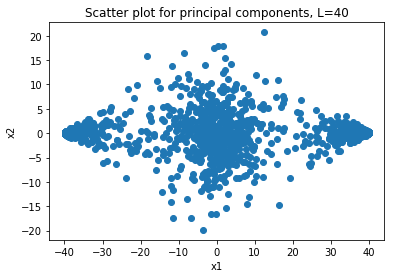

In [16]:
plt.scatter(x1_ising_prime_40, x2_ising_prime_40)
plt.title('Scatter plot for principal components, L=40')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()
           

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


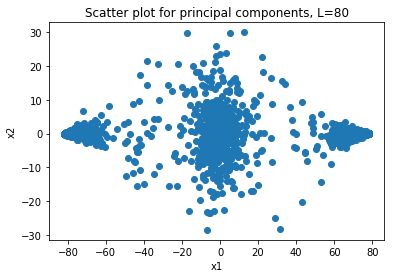

In [17]:
plt.scatter(x1_ising_prime_80, x2_ising_prime_80)
plt.title('Scatter plot for principal components, L=80')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Calculate the explained variance ratio for each size

In [18]:
r_ising_20 = lamb_ising_20/np.sum(lamb_ising_20)
r_ising_40 = lamb_ising_40/np.sum(lamb_ising_40)
r_ising_80 = lamb_ising_80/np.sum(lamb_ising_80)

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


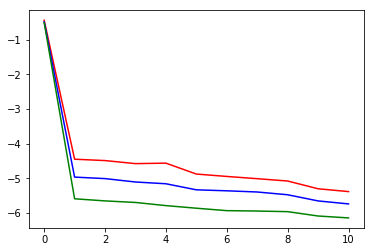

In [20]:
plt.plot(np.log(r_ising_20[0:11]),'r',np.log(r_ising_40[0:11]),'b',np.log(r_ising_80[0:11]),'g')
plt.show()

Examine the coloumns of P matrix $p_{i}$, especially $p_{1}$

In [21]:
p1_ising_20 = P_ising_20[:,0]
p1_ising_40 = P_ising_40[:,0]
p1_ising_80 = P_ising_80[:,0]

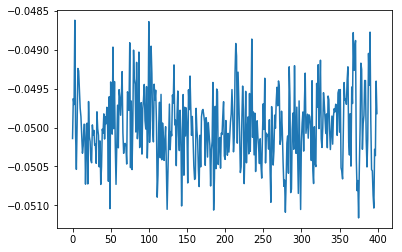

In [22]:
plt.plot(p1_ising_20)
plt.show()

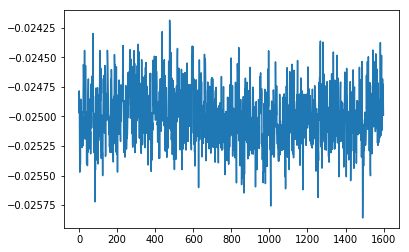

In [23]:
plt.plot(p1_ising_40)
plt.show()

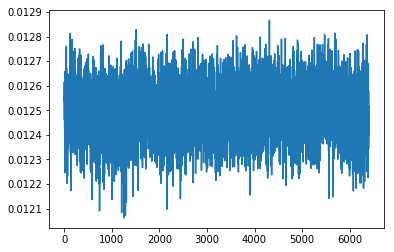

In [24]:
plt.plot(p1_ising_80)
plt.show()

Label the data point in scatter plot by temperature in terms of colors. Since our data, 2000 for each size L, is distributed over 20 temperatures uniformly so we have to assign 20 colors to our data. 

In [25]:
import matplotlib.cm as cm

In [26]:
temperatures = np.zeros(2000)
temp = 1.0
for i in range(2000):
    temperatures[i]= temp
    if i != 0 and i%99 == 0:
        temp += 0.1

In [150]:
temperatures[298]
temp

3.0000000000000018

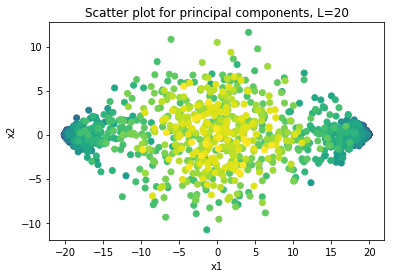

In [27]:
plt.scatter(x1_ising_prime_20, x2_ising_prime_20, c=temperatures)
plt.title('Scatter plot for principal components, L=20')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

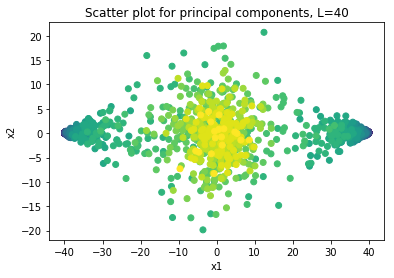

In [28]:
plt.scatter(x1_ising_prime_40, x2_ising_prime_40, c=temperatures)
plt.title('Scatter plot for principal components, L=40')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

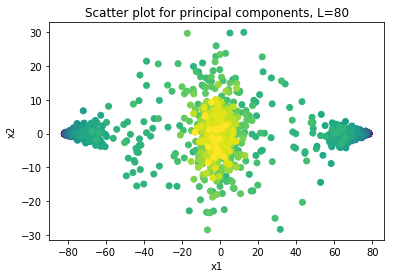

In [29]:
plt.scatter(x1_ising_prime_80, x2_ising_prime_80, c=temperatures)
plt.title('Scatter plot for principal components, L=80')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Plot the gauge case

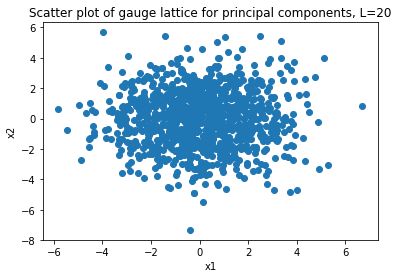

In [30]:
plt.scatter(x1_gauge_prime_20, x2_gauge_prime_20)
plt.title('Scatter plot of gauge lattice for principal components, L=20')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

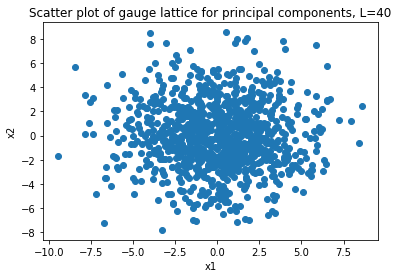

In [31]:
plt.scatter(x1_gauge_prime_40, x2_gauge_prime_40)
plt.title('Scatter plot of gauge lattice for principal components, L=40')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

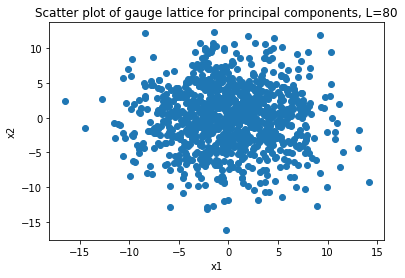

In [32]:
plt.scatter(x1_gauge_prime_80, x2_gauge_prime_80)
plt.title('Scatter plot of gauge lattice for principal components, L=80')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Calculate the explained variance ratio for each size

In [33]:
r_gauge_20 = lamb_gauge_20/np.sum(lamb_gauge_20)
r_gauge_40 = lamb_gauge_40/np.sum(lamb_gauge_40)
r_gauge_80 = lamb_gauge_80/np.sum(lamb_gauge_80)

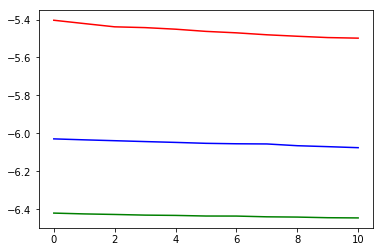

In [34]:
plt.plot(np.log(r_gauge_20[0:11]),'r',np.log(r_gauge_40[0:11]),'b',np.log(r_gauge_80[0:11]),'g')
plt.show()

In [35]:
p1_gauge_20 = P_gauge_20[:,0]
p1_gauge_40 = P_gauge_40[:,0]
p1_gauge_80 = P_gauge_80[:,0]

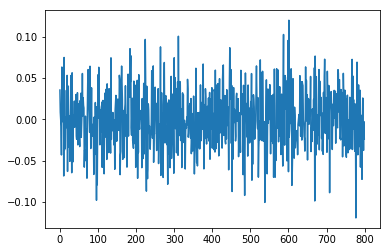

In [36]:
plt.plot(p1_gauge_20)
plt.show()

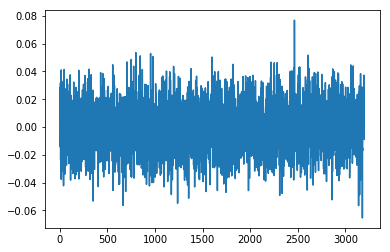

In [37]:
plt.plot(p1_gauge_40)
plt.show()

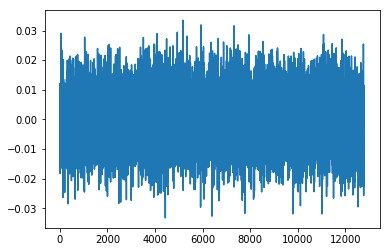

In [38]:
plt.plot(p1_gauge_80)
plt.show()